In [45]:
from tqdm import tqdm
import sys
from sklearn.model_selection import train_test_split
from torch.utils.data import (
    DataLoader, Dataset, RandomSampler, SubsetRandomSampler, Subset, SequentialSampler
)
from MTGNet import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from search import *
import matplotlib.pyplot as plt
import torch
import numpy as np
import copy
import random
import argparse
import pickle
from util import *
# Multitask performance
# Gain distribution
# Estimation Error

In [76]:
# search for multiple
dataset = 'ETTm1'
ratio = '1'
import pickle
with open('./example_log/'+dataset+'/pred_pertask_trajactiveper_1e-05_206_2_9.pkl', "rb") as fp:   
    pred_traj = pickle.load(fp)
with open('./example_log/'+dataset+'/mask_pertask_trajactiveper_1e-05_206_2_9.pkl', "rb") as fp:   
    pred_mask = pickle.load(fp)
select_index = []
pred_traj = np.array(pred_traj)[[-3,-1]]
pred_mask = np.array(pred_mask)[[-3,-1]]
x,y,testx,testy = getdataset(dataset,ratio)
validy = y
validx = x
HOApath = '../gain_collection/collected_gain/ETT/ETTm1_HOA.csv'
TAGpath = '../gain_collection/collected_gain/ETT/ETTm1_TAG_HOA.csv'
TAGy = pd.read_csv(TAGpath,header= None , sep=' ').values*0.01
HOAy = pd.read_csv(HOApath,header= None , sep=' ').values
sample_num = 3000
search_num = 5
total_gain_traj,total_select = approx_optimal(sample_num,search_num,pred_traj,testy,testx,dataset,pred_mask)
total_HOA_gain_traj,HOA_select = approx_optimal(sample_num,search_num,[HOAy,HOAy],testy,testx,dataset,[validx,validx])
total_HOA_gain_traj = total_HOA_gain_traj[0]
total_TAG_gain_traj,TAG_select = approx_optimal(sample_num,search_num,[TAGy,TAGy],testy,testx,dataset,[validx,validx])
total_TAG_gain_traj = total_TAG_gain_traj[0]
oracle_gain_traj,oracel_select = approx_optimal(sample_num,search_num,[validy,validy],testy,testx,dataset,[validx,validx])
oracle_gain_traj = oracle_gain_traj[0]
sample_num = 7
search_num = 1
budget = 7
total_traj=[]
for iteration in range(300):
    rand_traj = []
    for num in range(1,8):
        while(True):
            sample_list = np.random.choice(np.arange(len(x)) ,size = num,replace = False )
            a = np.zeros((len(x[0])),)
            for i in x[sample_list]:
                a = a+i
            if(len(a[a==0])==0 ):
                value = np.zeros((len(x[0])))
                selected = validy[sample_list]
                test = testy[sample_list]
                testmask = testx[sample_list]
                for i in range(len(y[0])):
                    value[i] = test[np.argmax(selected[:,i])][i]
                break
        rand_traj.append(value.sum())
    total_traj.append(np.array(rand_traj))
random_traj = np.array(total_traj).mean(0)
x,y,testx,testy = getdataset(dataset,ratio)

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
cut_length = 7
NN_gain1 = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_gain_traj[0])[:cut_length]/7 })
rand_group = pd.DataFrame({'budget':list(range(1,cut_length+ 1)),'gain': random_traj/7 })
NN_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_gain_traj[-1])[:cut_length]/7 })
HOA_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(total_HOA_gain_traj)[:cut_length]/7 })
TAG_gain = pd.DataFrame({'budget':list(range(1,len(total_TAG_gain_traj)+1)),'gain': np.array(total_TAG_gain_traj)/7})
oracle_gain = pd.DataFrame({'budget':list(range(1,cut_length+1)),'gain': np.array(oracle_gain_traj)[:cut_length]/7 })
HOA_gain['type'] = 'HOA gain'
TAG_gain['type'] = 'TAG gain'
NN_gain['type'] = 'MTG-Net N=3'
NN_gain1['type'] = 'MTG-Net N=1'
oracle_gain['type'] = 'Valid orcale'
rand_group['type'] = 'Random'
import seaborn as sns
all_gain = pd.concat([oracle_gain,NN_gain,NN_gain1,HOA_gain,TAG_gain,rand_group],axis=0)

load ETTm1
load ETTm1


In [77]:
x,y,testx,testy = getdataset(dataset,ratio)
plt.rcParams['pdf.use14corefonts'] = True
NN_gain1 = pd.DataFrame({'budget':list(range(1,8)),'gain': np.array(total_gain_traj[0])/7 })
NN_gain = pd.DataFrame({'budget':list(range(1,8)),'gain': np.array(total_gain_traj[-1])/7 })
HOA_gain = pd.DataFrame({'budget':list(range(1,8)),'gain': np.array(total_HOA_gain_traj)/7 })
TAG_gain = pd.DataFrame({'budget':list(range(1,8)),'gain': np.array(total_TAG_gain_traj)/7})
oracle_gain = pd.DataFrame({'budget':list(range(1,8)),'gain': np.array(oracle_gain_traj)/7 })
rand_group = pd.DataFrame({'budget':list(range(1,8)),'gain': random_traj/7 })
HOA_gain['type'] = 'HOA'
NN_gain['type'] = 'MTG-Net ($K$=3)'
NN_gain1['type'] = 'MTG-Net ($K$=1)'
oracle_gain['type'] = 'Oracle'
TAG_gain['type'] = 'TAG'
rand_group['type'] = 'Random'
import seaborn as sns
all_gain = pd.concat([oracle_gain,NN_gain,NN_gain1,HOA_gain,TAG_gain,rand_group],axis=0)

load ETTm1


/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe6ed931320> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe6ed931c18> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe6ed931da0> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe6ed931f60> has a label of '_' which cannot be automatically added to the legend.
/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipyker

load ETTm1
load ETTm1


/home/covpreduser/.conda/envs/sxz/lib/python3.7/site-packages/ipykernel_launcher.py:139: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


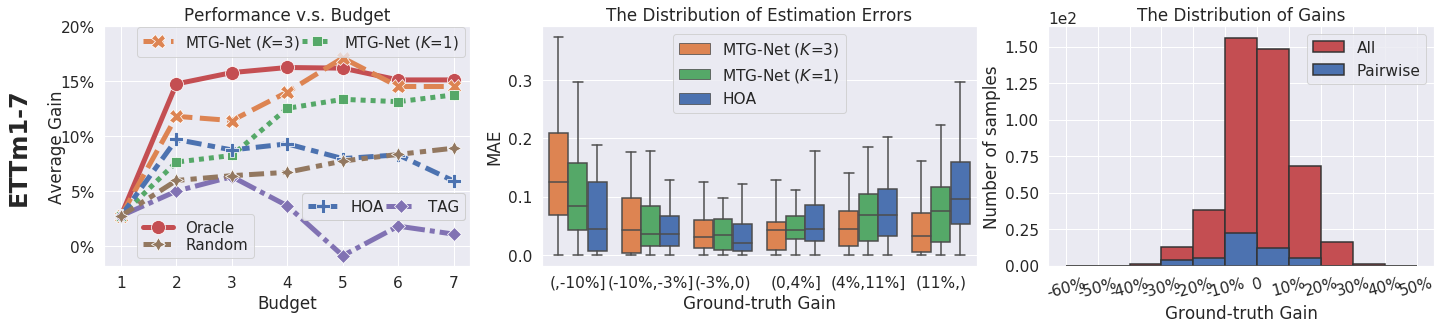

In [78]:
gs = gridspec.GridSpec(2, 140)
plt.figure(figsize=(24.9,4.4))
ax_title = plt.subplot(gs[:,:6])
ax_title.grid(False)
ax_title.set_facecolor('white')
ax_title.set_xticklabels([])
ax_title.set_ylabel('ETTm1-7',fontsize=24,fontweight="bold")
ax_title.set_yticklabels([])
ax1 = plt.subplot(gs[:,6:43])
sns.set(font_scale=1.4)
mypalette = [sns.color_palette()[3],sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[0],sns.color_palette()[4],sns.color_palette()[5]]
sns.lineplot(x="budget", y="gain",hue="type",style='type', markers=True,linewidth = 5,markersize=14,palette=mypalette, data=all_gain, ax = ax1,ci=0,markevery=1)
plt.ylabel('Average Gain',labelpad=-5)
ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_yticks([0,0.05,0.1,0.15,0.2])
ax1.set_yticklabels(['0%','5%','10%','15%','20%'])
ax1.set_xlabel('Budget')
plt.legend()
l1 = ax1.legend(['Oracle','_','_','_','_','Random'],ncol = 1,loc='lower left',bbox_to_anchor=(0.07,0.00),fontsize=15,columnspacing=0.15,labelspacing=0.15)
l2 = ax1.legend(['_','_','_','HOA','TAG','_'],ncol = 2,loc='lower left',bbox_to_anchor=(0.52,0.16),fontsize=15,columnspacing=0.15,labelspacing=0.15)
ax1.add_artist(l1)
ax1.add_artist(l2)
ax1.legend(['_','MTG-Net ($K$=3)','MTG-Net ($K$=1)'],ncol = 2,loc='lower left',bbox_to_anchor=(0.07,0.84),fontsize=15,columnspacing=0.15,labelspacing=0.15)
ax1.add_artist(l2)
plt.title("Performance v.s. Budget")
ax2 = plt.subplot(gs[:,101:147])
plt.title('The Distribution of Gains')
x,y,testx,testy = getdataset('ETTm1',ratio)
HOA = pd.read_csv(HOApath,header= None , sep=' ').values
import copy
y_n2 = y
P_n2 = HOA
ground_truth = y
range0 = np.percentile(y[y<0],0)
range1 = np.percentile(y[y<0],25)
range2 = np.percentile(y[y<0],66)
range3 = 0
range4 = np.percentile(y[y>0],33)
range5 = np.percentile(y[y>0],80)
range6 = np.percentile(y[y>0],100)
boxplot_x = np.array([range0,range1,range2,range3,range4,range5,range6])
num_list = np.array([0.00,0.005,0.01,0.015])
total_width, n = 0.001, 2
width = total_width
num_list1 = num_list- width
bin_sel = np.array(list(range(-600,600,100)))*0.001
total_output = copy.deepcopy(pred_traj[-1])
total_output[total_output==-99] = 0
mask = np.ones(total_output.shape)
mask[total_output == 0] = 0
new_index =[]
for ii in x:
    for j in range(len(x)):
        if((ii == mask[j]).all()):
            new_index.append(j)
total_output = np.vstack((y[:7],total_output[new_index]))
name_list = ['-60%','-50%','-40%','-30%','-20%','-10%','0','10%','20%','30%','40%','50%']
plt.xticks(bin_sel,name_list)
dataset = 'ETTm1'
x,y,testx,testy = getdataset(dataset,ratio)
plt.hist(y[y!=0], bins=bin_sel, normed=0, color=sns.color_palette()[3],linewidth=1.5,edgecolor =(0.2,0.2,0.2),label='All', alpha=1)
plt.hist(y[:30][y[:30]!=0], bins=bin_sel, normed=0, color=sns.color_palette()[0],linewidth=1.5,edgecolor =(0.2,0.2,0.2),label='Pairwise', alpha=1)
plt.xticks(rotation=15)
ax2.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.legend()
plt.xlabel('Ground-truth Gain')
plt.ylabel('Number of samples')
name_list = ['(,-10%]','(-10%,-3%]','(-3%,0)','(0,4%]','(4%,11%]','(11%,)']
with open('./example_log/'+dataset+'/pred_pertask_trajactiveper_1e-05_206_2_21.pkl', "rb") as fp:   
    pred_traj = pickle.load(fp)
model_pred = np.array(pred_traj)[[-14,-1]]
average_boxplot= []
for i in range(len(boxplot_x)-1):
    average_boxplot.append(abs(P_n2[((y_n2>boxplot_x[i]) & (y_n2<boxplot_x[i+1]))] - y_n2[((y_n2>boxplot_x[i]) & (y_n2<boxplot_x[i+1]))] ))
NN_boxplot = []
for i in range(len(boxplot_x)-1):
    NN_boxplot.append(abs(total_output[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] - ground_truth[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] ))
type_column = []
MAE_column = []
Range_column = []
for i in range(len(name_list)):
    for j in average_boxplot[i]:
        type_column.append('HOA')
        MAE_column.append(j)
        Range_column.append(name_list[i])
df_set = {'type':type_column,
        'MAE':MAE_column,
        'Range':Range_column}
df_average = pd.DataFrame(data = df_set)
type_column = []
MAE_column = []
Range_column = []
for i in range(len(name_list)):
    for j in NN_boxplot[i]:
        type_column.append('MTG-Net ($K$=3)')
        MAE_column.append(j)
        Range_column.append(name_list[i])
df_set = {'type':type_column,
        'MAE':MAE_column,
        'Range':Range_column}
df_NN1 = pd.DataFrame(data = df_set)

total_output = copy.deepcopy(model_pred[-2])
total_output[total_output==-99] = 0
mask = np.ones(total_output.shape)
mask[total_output == 0] = 0
new_index =[]
for ii in x:
    for j in range(len(x)):
        if((ii == mask[j]).all()):
            new_index.append(j)
total_output = np.vstack((y[:7],total_output[new_index]))
total_output[total_output==-99] = 0
NN_boxplot = []
for i in range(len(boxplot_x)-1):
    NN_boxplot.append(abs(total_output[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] - ground_truth[((ground_truth>boxplot_x[i]) & (ground_truth<boxplot_x[i+1]))] ) )
type_column = []
MAE_column = []
Range_column = []
for i in range(len(name_list)):
    for j in NN_boxplot[i]:
        type_column.append('MTG-Net ($K$=1)')
        MAE_column.append(j)
        Range_column.append(name_list[i])
df_set = {'type':type_column,
        'MAE':MAE_column,
        'Range':Range_column}
df_NN2 = pd.DataFrame(data = df_set)

all_average = pd.concat([df_NN1,df_NN2,df_average],axis=0)
ax3 = plt.subplot(gs[:,50:94])
sns.boxplot(x="Range", y="MAE",
                hue="type", palette= (sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[0]),
                data=all_average,showfliers = False,saturation=1 )
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles[0:], labels=labels[0:])
plt.xlabel('Ground-truth Gain')
plt.title('The Distribution of Estimation Errors')
plt.tight_layout()
plt.show()